**Car Price Prediction::**

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

Problem Statement::
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

**task::**
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**WORKFLOW ::**

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it) 6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction


In [ ]:
import pandas as pd
import numpy as np
from keras import models,layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
def one_encode(l):
  integer_mapping = {x: i for i,x in enumerate(l)}
  vec = [integer_mapping[word] for word in l]
  return vec

In [ ]:
l=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for i in l:
  df[i]=one_encode(df[i])

In [ ]:
df=df.astype('float64')

In [ ]:
df.dtypes

car_ID              float64
symboling           float64
CarName             float64
fueltype            float64
aspiration          float64
doornumber          float64
carbody             float64
drivewheel          float64
enginelocation      float64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype          float64
cylindernumber      float64
enginesize          float64
fuelsystem          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
t_val=int((50/100)*len(df['car_ID']))
test_val=int((30/100)*len(df['car_ID']))
val_val=int((20/100)*len(df['car_ID']))

In [ ]:
test_data=np.concatenate((df.loc[ :(test_val//2) ,:'highwaympg'],df.loc[(len(df)-(test_val//2)):  ,:'highwaympg']),axis=0)
test_label=np.concatenate((df.loc[:(test_val//2),:'price'],df.loc[len(df)-(test_val//2):,:'price']))

remaining_data=df.loc[(test_val//2):len(df)-(test_val//2),:'highwaympg']
remaining_labels=df.loc[(test_val//2):len(df)-(test_val//2),:'price']


In [ ]:
mean=remaining_data.mean(axis=0)
std=remaining_data.std(axis=0)

remaining_data-=mean
remaining_data/=std

test_data-=mean
test_data/=std


In [ ]:
train_data=remaining_data[:t_val]
train_labels=remaining_labels[:t_val]

val_data=remaining_data[t_val:]
val_labels=remaining_labels[t_val:]

In [41]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(14, activation='relu', input_shape=(25,)))
  model.add(layers.Dense(10,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [42]:
k = 4
num_val_samples = len(remaining_data) // k
num_epochs = 10
all_scores = []
for i in range(k):
 print('processing fold #', i)


 # Prepare the validation data: data from partition # k
 val_data = remaining_data[i * num_val_samples: (i + 1) * num_val_samples]
 val_targets = remaining_labels[i * num_val_samples: (i + 1) * num_val_samples]


 # Prepare the training data: data from all other partitions

 partial_train_data = np.concatenate(
 [remaining_data[:i * num_val_samples],
 remaining_data[(i + 1) * num_val_samples:]],
 axis=0)

 partial_train_targets = np.concatenate(
 [remaining_labels[:i * num_val_samples],
 remaining_labels[(i + 1) * num_val_samples:]],
 axis=0)
 # Build the Keras model (already compiled)
 model = build_model()
 # Train the model (in silent mode, verbose=0)
 history=model.fit(partial_train_data, partial_train_targets,epochs=num_epochs,validation_data=(val_data, val_targets), batch_size=1, verbose=1)
 # Evaluate the model on the validation data
 mae_history = history.history['val_mae']
 all_scores.append(mae_history)

processing fold # 0
Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 8512340.5315 - mae: 853.4792 - val_loss: 8499264.0000 - val_mae: 824.9797
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 9512577.5450 - mae: 870.7421 - val_loss: 8496019.0000 - val_mae: 823.2394
Epoch 3/10
110/110 [==============================] - 0s 1ms/step - loss: 11684526.7050 - mae: 909.0328 - val_loss: 8491366.0000 - val_mae: 820.9171
Epoch 4/10
110/110 [==============================] - 0s 1ms/step - loss: 9299692.5811 - mae: 858.7331 - val_loss: 8484885.0000 - val_mae: 817.8561
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 10406858.0315 - mae: 888.4942 - val_loss: 8476238.0000 - val_mae: 813.9045
Epoch 6/10
110/110 [==============================] - 0s 1ms/step - loss: 8430830.4324 - mae: 819.3643 - val_loss: 8464289.0000 - val_mae: 809.3911
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 11201944.1532 - 

In [ ]:
len(all_scores[0])

7

In [43]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

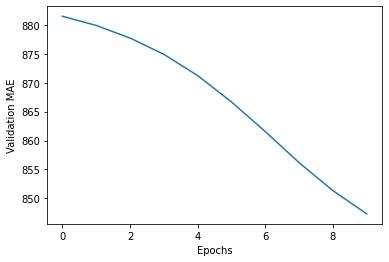

In [44]:
plt.plot(range(len(average_mae_history)), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [45]:
model.evaluate(test_data,test_label)

2/2 [==============================] - 0s 6ms/step - loss: 11322369.0000 - mae: 931.1113


[11322369.0, 931.1112670898438]

In [46]:
model.predict(test_data)

array([[135.3709  ],
       [134.60225 ],
       [156.57402 ],
       [127.64557 ],
       [116.49236 ],
       [156.33424 ],
       [182.9605  ],
       [184.63211 ],
       [216.5252  ],
       [139.86748 ],
       [137.89862 ],
       [127.52046 ],
       [142.44426 ],
       [136.53688 ],
       [170.52    ],
       [225.97816 ],
       [234.79268 ],
       [275.06052 ],
       [ 82.6036  ],
       [ 91.46515 ],
       [ 76.408035],
       [ 96.23672 ],
       [ 96.749825],
       [105.20273 ],
       [ 89.857254],
       [ 84.372765],
       [ 83.94489 ],
       [ 98.70759 ],
       [106.077385],
       [167.17891 ],
       [110.67722 ],
       [ 20.720291],
       [ 21.911816],
       [ 21.153885],
       [ 86.80022 ],
       [ 88.629555],
       [ 85.91996 ],
       [ 85.26052 ],
       [  8.648748],
       [ 18.258213],
       [  6.622422],
       [ 12.806258],
       [ 11.989087],
       [ 12.295834],
       [  9.425937],
       [ 34.149643],
       [ 41.61568 ],
       [ 32.2